In [1]:
 #step1:load packages and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!curl "http://www.codeheroku.com/static/workshop/datasets/ecommerce.zip" -o "ecommerce.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   167  100   167    0     0    970      0 --:--:-- --:--:-- --:--:--   970


In [3]:
#Step2: Read csv file 
data_frame=pd.read_csv('data.csv',encoding="latin-1")
data_frame.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#Step3: Look Null values/Missing values
data_frame.isnull().sum()
data_frame.dropna(subset=['CustomerID'],inplace=True)
data_frame.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [5]:
data_frame.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
#data cleaning: remove anomalies
data_frame=data_frame[data_frame['Quantity']>0]
data_frame.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [10]:
data_frame['UnitPrice_dollar']=data_frame['UnitPrice'].apply(lambda x: round(x*1.16,2))

In [11]:
data_frame.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_dollar
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2.96
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3.93
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,3.19
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3.93
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3.93


In [15]:
#to get a distribution of total amount spent by invoice
data_frame['TotalPrice_dollar']=round(data_frame['UnitPrice_dollar']*data_frame['Quantity'],2)

In [22]:
group_data=data_frame.groupby('InvoiceNo',as_index=False)['TotalPrice_dollar'].sum()
group_data

,InvoiceNo,TotalPrice_dollar
0,536365,161.34
1,536366,25.80
2,536367,323.30
3,536368,81.24
4,536369,20.70
5,536370,992.64
6,536371,236.80
7,536372,25.80
8,536373,301.42
9,536374,406.40


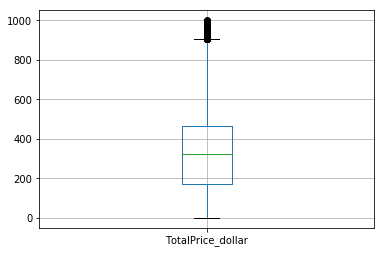

In [25]:
boxplot=group_data[group_data['TotalPrice_dollar']<1000].boxplot()
boxplot